In [131]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import cPickle as pickle

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

Populating the interactive namespace from numpy and matplotlib


In [127]:
n = 512
 
golden_angle = np.pi * (3 - np.sqrt(5))
theta = golden_angle * np.arange(n)
z = np.linspace(1 - 1.0 / n, 1.0 / n - 1, n)
radius = np.sqrt(1 - z * z)
 
points = np.zeros((n, 3))
points[:,0] = radius * np.cos(theta)
points[:,1] = radius * np.sin(theta)
points[:,2] = z

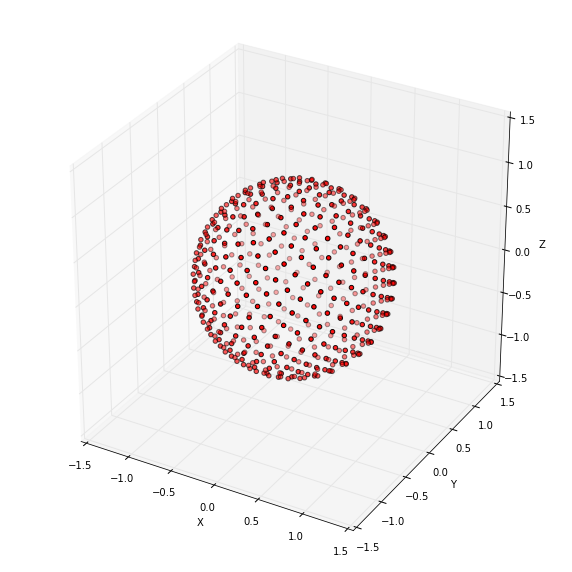

In [128]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = points[:,0]
ys = points[:,1]
zs = points[:,2]
ax.scatter(xs, ys, zs, c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [129]:
num_neighbors = 6
neighbors=[]
for i,p1 in enumerate(points):
    dists = []
    for j,p2 in enumerate(points):
        dists.append( [i, j, np.dot(p1,p2)] )
    sorted_dists = sorted(dists, key=lambda dists: -dists[2])
    for idx in range(1,1+num_neighbors):
        neighbors.append(sorted_dists[idx])

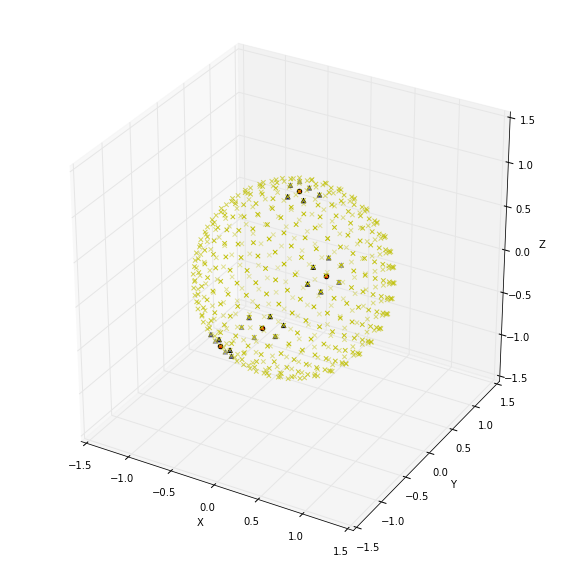

In [130]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = points[:,0]
ys = points[:,1]
zs = points[:,2]
ax.scatter(xs, ys, zs, c='y', marker='x')

for cidx in range(0,n,128):
    cx = points[cidx,0]
    cy = points[cidx,1]
    cz = points[cidx,2]
    ax.scatter(cx, cy, cz, c='r', marker='o')

    nOfC = neighbors[cidx*num_neighbors:(cidx+1)*num_neighbors]
    p = points[[nOfC[i][1] for i in range(num_neighbors)]]
    xs = p[:,0]
    ys = p[:,1]
    zs = p[:,2]
    ax.scatter(xs, ys, zs, c='b', marker='^')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [133]:
dictDataStorage = {
    'n'         : n,
    'points'    : points,
    'neighbors' : neighbors
}
with open('sphere_sampling.pkl','w') as f:
    pickle.dump(dictDataStorage,f)